In [1]:
# see corelation between peoples political position in some other political situation vs their political position in vaccines



In [2]:
#installs
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git
! pip install -U textblob
! python -m textblob.download_corpora
!pip install pandas
!pip install wordcloud
!pip install plotly==5.3.1

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /private/var/folders/mt/qw7xv63x7jvggcw3qnj7j2l40000gn/T/pip-req-build-1wzurkst
  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git /private/var/folders/mt/qw7xv63x7jvggcw3qnj7j2l40000gn/T/pip-req-build-1wzurkst
[nltk_data] Downloading package brown to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/b

In [3]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import os

#Data Preprocessing and Feature Engineering
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
import string

import re
import nltk
from bs4 import BeautifulSoup
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import plotly.express as pex

import urllib
import requests

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
pd.set_option("display.max_colwidth", -1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-3-925d8c1fc7f6>:40: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
tweet_count = 50000
text_query = "COVID-19 Vaccine"
since_date = "2020-04-01"
until_date = "2020-04-30"

os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, until_date))

0

In [6]:
tweets_df= pd.read_json('text-query-tweets.json', lines=True)
tweets_df.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                              url  \
0  https://twitter.com/manniteo44/status/1255648045146025992        
1  https://twitter.com/stevetwilightim/status/1255648023113277440   
2  https://twitter.com/Kingsto03059415/status/1255647987751104515   
3  https://twitter.com/stevetwilightim/status/1255647968105058306   
4  https://twitter.com/riversshx/status/1255647967199072256         

                       date  \
0 2020-04-29 23:59:57+00:00   
1 2020-04-29 23:59:52+00:00   
2 2020-04-29 23:59:43+00:00   
3 2020-04-29 23:59:39+00:00   
4 2020-04-29 23:59:38+00:00   

                                                                                                                                                                                                                                                                                                                                   content  \
0  @brndn_mcleod @the_resistor @realDonaldTrump The whole19-20 flu deaths at its height was 53000. That season is over&amp; remember there is a vaccine for the combined N1H1 flu so becoming infected was among those play roulette. Today the US Covid-19 deaths since the 1st case 1/21/20 is more than 61,000-no vaccine. Still rising   
1  TESTING &amp; MITIGATION ARE KEY!\n\nBUY TIME FOR OUR DOCTORS, SCIENTISTS, NURSES &amp; HEALTHY PROFESSIONALS TO COME UP WITH A TREATMENT OR VACCINE TO STOP THIS HIDEOUS COVID 19--PLEASE STAY AT HOME FOR NEXT 3 TO 4 WEEKS https://t.co/7qSpqwqYQW                                                                                     
2  Covid-19: CR seeks FG’s support to build vaccine production plant https://t.co/gdveV1Tobh                                                                                                                                                                                                                                                 
3  TESTING &amp; MITIGATION ARE KEY!\n\nBUY TIME FOR OUR DOCTORS, SCIENTISTS, NURSES &amp; HEALTHY PROFESSIONALS TO COME UP WITH A TREATMENT OR VACCINE TO STOP THIS HIDEOUS COVID 19--PLEASE STAY AT HOME FOR NEXT 3 TO 4 WEEKS https://t.co/qhqtw2tZ6y                                                                                     
4  WTH!? Microchip the people!!\nFrom Bill Gates' plot to microchip the world, to Dr. Fauci blocking natural cures: How anti-vaxxers are already peddling bizarre theories about COVID-19 vaccine BEFORE it even exists \nvia https://t.co/pzxAVWOVWn https://t.co/qWyVFEy1T4                                                                

                                                                                                                                                                                                                                                                                                                           renderedContent  \
0  @brndn_mcleod @the_resistor @realDonaldTrump The whole19-20 flu deaths at its height was 53000. That season is over&amp; remember there is a vaccine for the combined N1H1 flu so becoming infected was among those play roulette. Today the US Covid-19 deaths since the 1st case 1/21/20 is more than 61,000-no vaccine. Still rising   
1  TESTING &amp; MITIGATION ARE KEY!\n\nBUY TIME FOR OUR DOCTORS, SCIENTISTS, NURSES &amp; HEALTHY PROFESSIONALS TO COME UP WITH A TREATMENT OR VACCINE TO STOP THIS HIDEOUS COVID 19--PLEASE STAY AT HOME FOR NEXT 3 TO 4 WEEKS twitter.com/thehill/status…                                                                                 
2  Covid-19: CR seeks FG’s support to build vaccine production plant orientdailynews.com/?p=78749                                                                                                   

In [7]:
tweets_df.shape

(50000, 28)

In [8]:
tweets_df['date'].value_counts()

2020-04-29 15:27:33+00:00    27
2020-04-28 19:55:33+00:00    18
2020-04-24 22:30:20+00:00    14
2020-04-28 19:58:02+00:00    14
2020-04-29 15:28:03+00:00    13
                             ..
2020-04-20 16:49:06+00:00    1 
2020-04-25 12:33:40+00:00    1 
2020-04-28 02:23:21+00:00    1 
2020-04-23 22:12:51+00:00    1 
2020-04-24 11:25:37+00:00    1 
Name: date, Length: 48071, dtype: int64

In [9]:
tweets_df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

In [10]:
tweets_df.describe()

id    replyCount  retweetCount     likeCount    quoteCount  \
count  5.000000e+04  50000.000000  50000.00000   50000.000000  50000.000000   
mean   1.253743e+18  0.951420      2.68026       8.987760      0.545480       
std    1.066325e+15  18.440042     44.59577      179.687685    35.532916      
min    1.251762e+18  0.000000      0.00000       0.000000      0.000000       
25%    1.252933e+18  0.000000      0.00000       0.000000      0.000000       
50%    1.253674e+18  0.000000      0.00000       0.000000      0.000000       
75%    1.254653e+18  0.000000      0.00000       1.000000      0.000000       
max    1.255648e+18  2679.000000   4314.00000    19111.000000  7709.000000    

       conversationId  retweetedTweet  inReplyToTweetId  
count  5.000000e+04    0.0             1.091200e+04      
mean   1.253251e+18   NaN              1.253258e+18      
std    1.112093e+16   NaN              8.348780e+15      
min    6.408913e+17   NaN              7.081715e+17      
25%    1.252894e+18   NaN              1.252656e+18      
50%    1.253642e+18   NaN              1.253480e+18      
75%    1.254610e+18   NaN              1.254499e+18      
max    1.255648e+18   NaN              1.255647e+18

In [11]:
#as the data is coming from a web scrape, we would like to remove html using beautiful soup
#this below block of code is written to remove html

def remove_html(content):
    soup=BeautifulSoup(content,'lxml')
    html_free=soup.get_text()
    return html_free

In [12]:
def remove_pattern(content, pattern):
    r = re.findall(pattern, content)
    for i in r:
        content = re.sub(i, "", content)
    return content

In [13]:
tweets_df['content'] = np.vectorize(remove_pattern)(tweets_df['content'], "@[\w]*")
tweets_df['content'] = np.vectorize(remove_pattern)(tweets_df['content'], "#[\w]*")
tweets_df['content'] = np.vectorize(remove_pattern)(tweets_df['content'], '[0-9]')
tweets_df['content'] = tweets_df['content'].str.replace("[^a-zA-Z#]", " ")
tweets_df['content'] = tweets_df['content'].apply(lambda x: ' '.join([i for i in x.split() if len(i) > 3]))

<ipython-input-13-0e0479d11138>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['content'] = tweets_df['content'].str.replace("[^a-zA-Z#]", " ")


In [14]:
tweets_df['content']

0        whole deaths height That season over remember there vaccine combined becoming infected among those play roulette Today Covid deaths since case more than vaccine Still rising                           
1        TESTING MITIGATION TIME DOCTORS SCIENTISTS NURSES HEALTHY PROFESSIONALS COME WITH TREATMENT VACCINE STOP THIS HIDEOUS COVID PLEASE STAY HOME NEXT WEEKS https qSpqwqYQW                                 
2        Covid seeks support build vaccine production plant https gdveVTobh                                                                                                                                      
3        TESTING MITIGATION TIME DOCTORS SCIENTISTS NURSES HEALTHY PROFESSIONALS COME WITH TREATMENT VACCINE STOP THIS HIDEOUS COVID PLEASE STAY HOME NEXT WEEKS https qhqtwtZy                                  
4        Microchip people From Bill Gates plot microchip world Fauci blocking natural cures anti vaxxers already peddling bizarre theories about COVID vaccine B

In [15]:
tweet_content_df = tweets_df['content'].apply(lambda x: x.split())
tweet_content_df

0        [whole, deaths, height, That, season, over, remember, there, vaccine, combined, becoming, infected, among, those, play, roulette, Today, Covid, deaths, since, case, more, than, vaccine, Still, rising]                             
1        [TESTING, MITIGATION, TIME, DOCTORS, SCIENTISTS, NURSES, HEALTHY, PROFESSIONALS, COME, WITH, TREATMENT, VACCINE, STOP, THIS, HIDEOUS, COVID, PLEASE, STAY, HOME, NEXT, WEEKS, https, qSpqwqYQW]                                      
2        [Covid, seeks, support, build, vaccine, production, plant, https, gdveVTobh]                                                                                                                                                         
3        [TESTING, MITIGATION, TIME, DOCTORS, SCIENTISTS, NURSES, HEALTHY, PROFESSIONALS, COME, WITH, TREATMENT, VACCINE, STOP, THIS, HIDEOUS, COVID, PLEASE, STAY, HOME, NEXT, WEEKS, https, qhqtwtZy]                                       
4        [Microchip, people, From, Bill, Gat

In [16]:
ps = PorterStemmer()
tweet_content_df = tweet_content_df.apply(lambda x: [ps.stem(i) for i in x])
tweet_content_df.head()

0    [whole, death, height, that, season, over, rememb, there, vaccin, combin, becom, infect, among, those, play, roulett, today, covid, death, sinc, case, more, than, vaccin, still, rise]                          
1    [test, mitig, time, doctor, scientist, nurs, healthi, profession, come, with, treatment, vaccin, stop, thi, hideou, covid, pleas, stay, home, next, week, http, qspqwqyqw]                                       
2    [covid, seek, support, build, vaccin, product, plant, http, gdvevtobh]                                                                                                                                           
3    [test, mitig, time, doctor, scientist, nurs, healthi, profession, come, with, treatment, vaccin, stop, thi, hideou, covid, pleas, stay, home, next, week, http, qhqtwtzi]                                        
4    [microchip, peopl, from, bill, gate, plot, microchip, world, fauci, block, natur, cure, anti, vaxxer, alreadi, peddl, bizarr, theori, a

In [17]:
for i in range(len(tweet_content_df)):
    tweet_content_df[i] = ' '.join(tweet_content_df[i])
tweets_df['content'] = tweet_content_df
tweets_df.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                              url  \
0  https://twitter.com/manniteo44/status/1255648045146025992        
1  https://twitter.com/stevetwilightim/status/1255648023113277440   
2  https://twitter.com/Kingsto03059415/status/1255647987751104515   
3  https://twitter.com/stevetwilightim/status/1255647968105058306   
4  https://twitter.com/riversshx/status/1255647967199072256         

                       date  \
0 2020-04-29 23:59:57+00:00   
1 2020-04-29 23:59:52+00:00   
2 2020-04-29 23:59:43+00:00   
3 2020-04-29 23:59:39+00:00   
4 2020-04-29 23:59:38+00:00   

                                                                                                                                                                                content  \
0  whole death height that season over rememb there vaccin combin becom infect among those play roulett today covid death sinc case more than vaccin still rise                           
1  test mitig time doctor scientist nurs healthi profession come with treatment vaccin stop thi hideou covid pleas stay home next week http qspqwqyqw                                     
2  covid seek support build vaccin product plant http gdvevtobh                                                                                                                           
3  test mitig time doctor scientist nurs healthi profession come with treatment vaccin stop thi hideou covid pleas stay home next week http qhqtwtzi                                      
4  microchip peopl from bill gate plot microchip world fauci block natur cure anti vaxxer alreadi peddl bizarr theori about covid vaccin befor even exist http pzxavwovwn http qwyvfeyt   

                                                                                                                                                                                                                                                                                                                           renderedContent  \
0  @brndn_mcleod @the_resistor @realDonaldTrump The whole19-20 flu deaths at its height was 53000. That season is over&amp; remember there is a vaccine for the combined N1H1 flu so becoming infected was among those play roulette. Today the US Covid-19 deaths since the 1st case 1/21/20 is more than 61,000-no vaccine. Still rising   
1  TESTING &amp; MITIGATION ARE KEY!\n\nBUY TIME FOR OUR DOCTORS, SCIENTISTS, NURSES &amp; HEALTHY PROFESSIONALS TO COME UP WITH A TREATMENT OR VACCINE TO STOP THIS HIDEOUS COVID 19--PLEASE STAY AT HOME FOR NEXT 3 TO 4 WEEKS twitter.com/thehill/status…                                                                                 
2  Covid-19: CR seeks FG’s support to build vaccine production plant orientdailynews.com/?p=78749                                                                                                                                                                                                                                            
3  TESTING &amp; MITIGATION ARE KEY!\n\nBUY TIME FOR OUR DOCTORS, SCIENTISTS, NURSES &amp; HEALTHY PROFESSIONALS TO COME UP WITH A TREATMENT OR VACCINE TO STOP THIS HIDEOUS COVID 19--PLEASE STAY AT HOME FOR NEXT 3 TO 4 WEEKS twitter.com/JohnsHopkinsSP…                                                                                 
4  WTH!? Microchip the people!!\nFrom Bill Gates' plot to microchip the world, to Dr. Fauci blocking natural cures: How anti-vaxxers are already peddling bizarre theories about COVID-19 vaccine BEFORE it even exists \nvia dailym.ai/ios mol.im/a/8267993                                                                                 

                    id  \
0  1255648045146025992   
1  1255648023113277440 

In [18]:
text = " ".join(i for i in tweets_df.content.astype(str))

In [19]:
text

'whole death height that season over rememb there vaccin combin becom infect among those play roulett today covid death sinc case more than vaccin still rise test mitig time doctor scientist nurs healthi profession come with treatment vaccin stop thi hideou covid pleas stay home next week http qspqwqyqw covid seek support build vaccin product plant http gdvevtobh test mitig time doctor scientist nurs healthi profession come with treatment vaccin stop thi hideou covid pleas stay home next week http qhqtwtzi microchip peopl from bill gate plot microchip world fauci block natur cure anti vaxxer alreadi peddl bizarr theori about covid vaccin befor even exist http pzxavwovwn http qwyvfeyt rather start again friend know have current trial will impact more than covid over come decad there potenti vaccin wonder liber spoke like when there onli tori they well comrad right that whole problem have vaccin covid also think meant anti viral anti vital wonder today first heard other viru vaccin be te

In [20]:
print ("There are {} words in the combination of all cells in column content.".format(len(text)))

There are 5205222 words in the combination of all cells in column content.


In [21]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
stop_words = set(stopwords.words('english'))
stop_words.update(["http"])
 
word_tokens = word_tokenize(text)
 
filtered_text = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_text = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_text.append(w)
 
print(word_tokens)
print(filtered_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



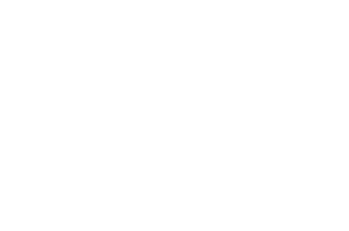

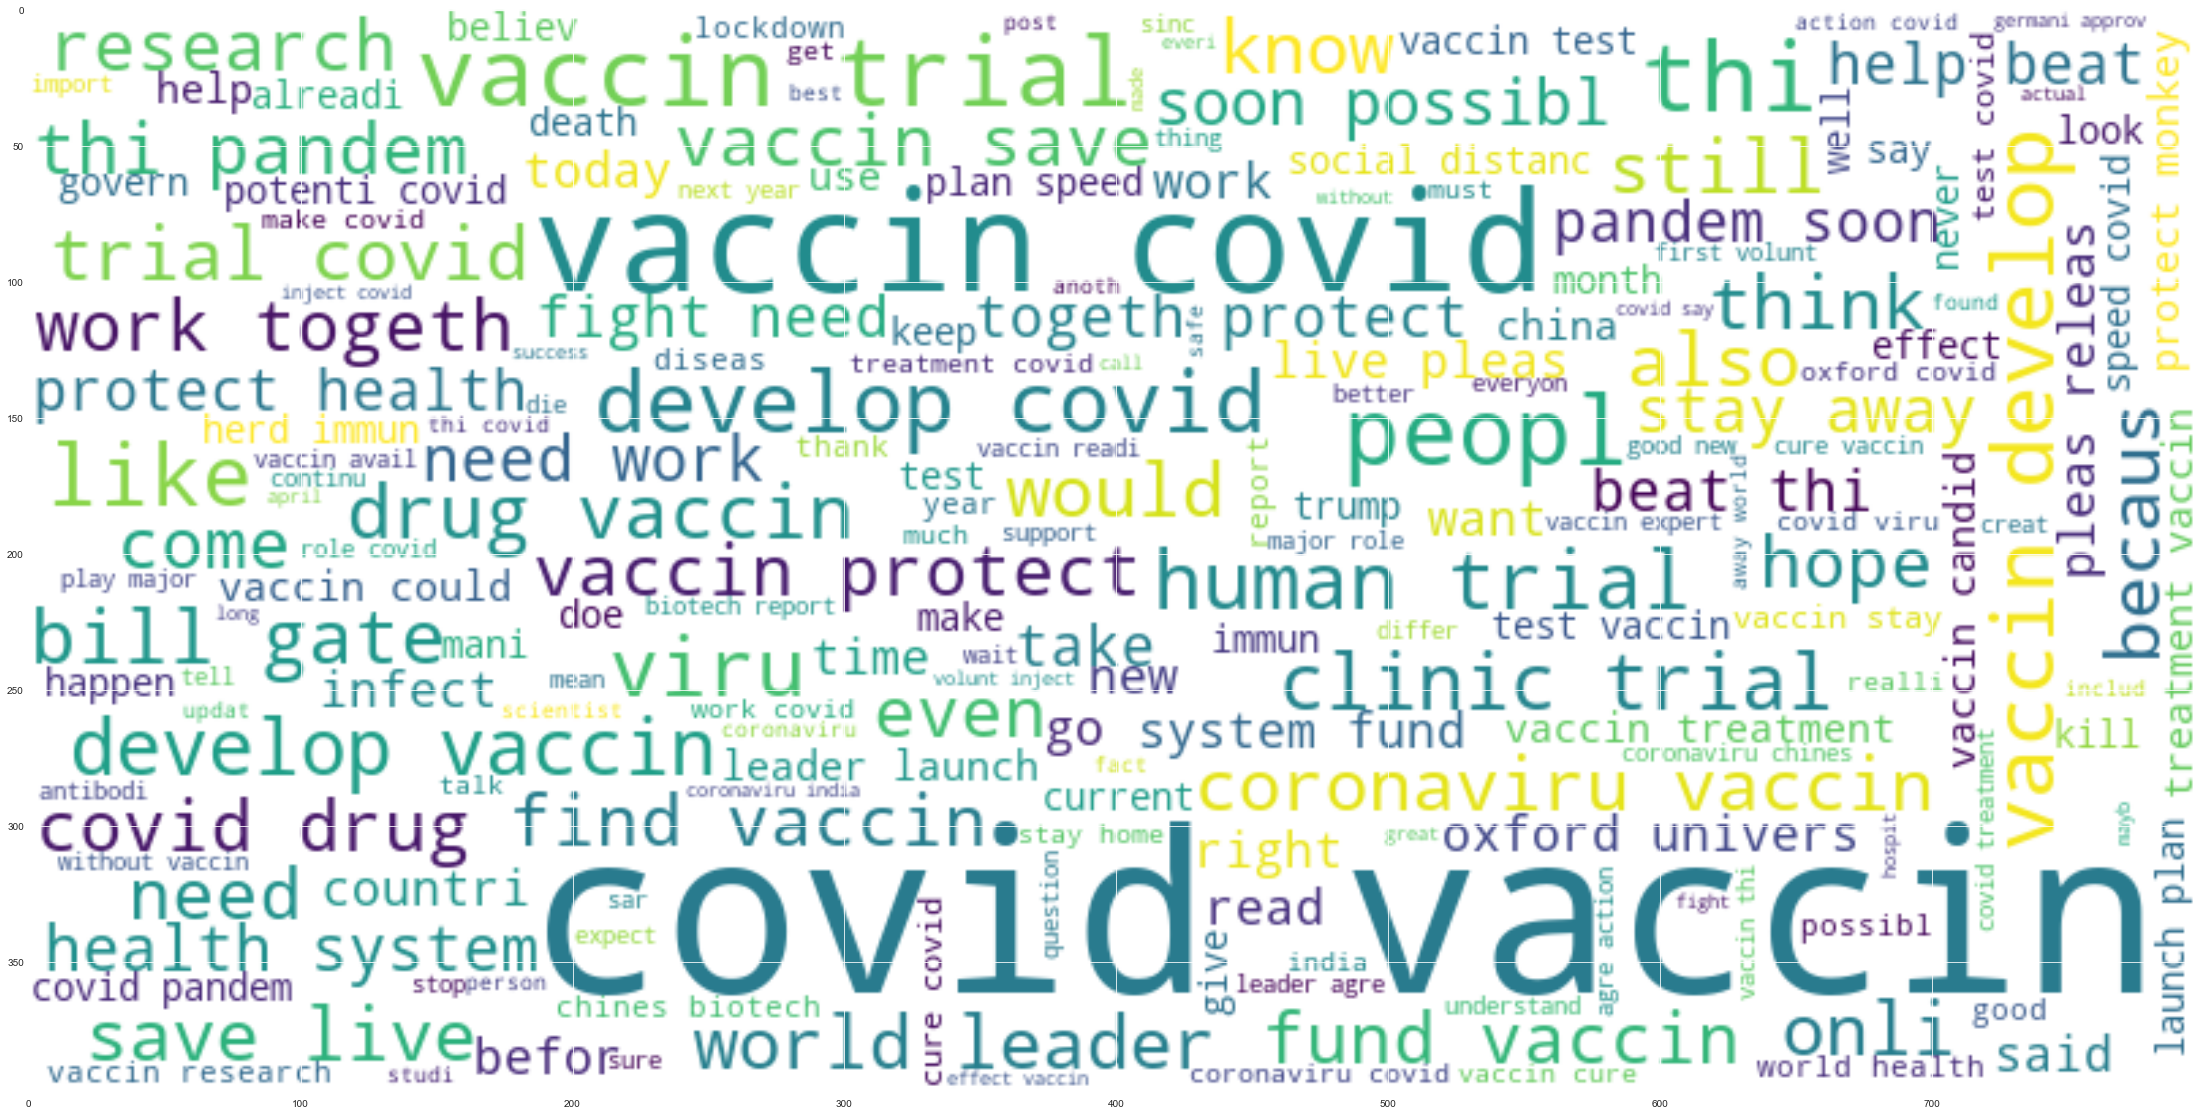

In [23]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [24]:
# df_concat = pd.read_csv('/Users/bindupriya/Desktop/tweets_with_sentiment_analysis/concatenated_sentiment_jan_may_2021.csv') 


In [25]:
# df5 = pd.read_csv('/Users/bindupriya/Desktop/tweets_with_sentiment_analysis/tweets_with_sentiment_may_2021.csv') 
# # df3 = pd.read_csv('/Users/bindupriya/Desktop/tweets_with_sentiment_analysis/tweets_with_sentiment_mar_2021.csv') 
# df1 = pd.read_csv('/Users/bindupriya/Desktop/tweets_with_sentiment_analysis/tweets_with_sentiment_jan_2021.csv') 
# df2 = pd.read_csv('/Users/bindupriya/Desktop/tweets_with_sentiment_analysis/tweets_with_sentiment_feb_2021.csv') 
# df4=pd.read_csv('/Users/bindupriya/Desktop/tweets_with_sentiment_analysis/tweets_with_sentiment_apr_2021.csv')

In [26]:
# df_concatenated = pd.read_csv('/Users/bindupriya/Desktop/tweets_with_sentiment_dates_jan_may_2021/concatenated_sentiment_jan_may_2021_date.csv') 


In [27]:
# df_concatenated.shape

In [28]:
# df_concatenated.head()

In [29]:
# df_concatenated.date.unique

In [30]:
# consumer_key='Sywh0hR2XEUDUw2OpcmHybboK' 
# consumer_secret = 'FAR8Vwb7nidiYxjYBXQ6Jbj8nWk4I0apGQbfLNnPuTmj1uty8a' 
# access_token = '1005487548-XhIc4vgZWguEGPqFVPX93zcyzjy668Q0U9tU0Ut' 
# access_token_secret ='8aarsgq1rvlQkyyTHHGHykQi5heF1BZFiCjlvoC9bT2K8' 
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth,wait_on_rate_limit=True)

In [31]:
# import plotly.express as px

# fig = px.line(df_concatenated, x='date', y="compound_score")
# fig.show()

In [32]:

# fig = px.bar(df_concatenated, x="date", y="compound_score")
# fig.show()


In [33]:
# tweets_df_copy=tweets_df

In [34]:
# tweets_df_copy.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                              url  \
0  https://twitter.com/manniteo44/status/1255648045146025992        
1  https://twitter.com/stevetwilightim/status/1255648023113277440   
2  https://twitter.com/Kingsto03059415/status/1255647987751104515   
3  https://twitter.com/stevetwilightim/status/1255647968105058306   
4  https://twitter.com/riversshx/status/1255647967199072256         

                       date  \
0 2020-04-29 23:59:57+00:00   
1 2020-04-29 23:59:52+00:00   
2 2020-04-29 23:59:43+00:00   
3 2020-04-29 23:59:39+00:00   
4 2020-04-29 23:59:38+00:00   

                                                                                                                                                                                content  \
0  whole death height that season over rememb there vaccin combin becom infect among those play roulett today covid death sinc case more than vaccin still rise                           
1  test mitig time doctor scientist nurs healthi profession come with treatment vaccin stop thi hideou covid pleas stay home next week http qspqwqyqw                                     
2  covid seek support build vaccin product plant http gdvevtobh                                                                                                                           
3  test mitig time doctor scientist nurs healthi profession come with treatment vaccin stop thi hideou covid pleas stay home next week http qhqtwtzi                                      
4  microchip peopl from bill gate plot microchip world fauci block natur cure anti vaxxer alreadi peddl bizarr theori about covid vaccin befor even exist http pzxavwovwn http qwyvfeyt   

                                                                                                                                                                                                                                                                                                                           renderedContent  \
0  @brndn_mcleod @the_resistor @realDonaldTrump The whole19-20 flu deaths at its height was 53000. That season is over&amp; remember there is a vaccine for the combined N1H1 flu so becoming infected was among those play roulette. Today the US Covid-19 deaths since the 1st case 1/21/20 is more than 61,000-no vaccine. Still rising   
1  TESTING &amp; MITIGATION ARE KEY!\n\nBUY TIME FOR OUR DOCTORS, SCIENTISTS, NURSES &amp; HEALTHY PROFESSIONALS TO COME UP WITH A TREATMENT OR VACCINE TO STOP THIS HIDEOUS COVID 19--PLEASE STAY AT HOME FOR NEXT 3 TO 4 WEEKS twitter.com/thehill/status…                                                                                 
2  Covid-19: CR seeks FG’s support to build vaccine production plant orientdailynews.com/?p=78749                                                                                                                                                                                                                                            
3  TESTING &amp; MITIGATION ARE KEY!\n\nBUY TIME FOR OUR DOCTORS, SCIENTISTS, NURSES &amp; HEALTHY PROFESSIONALS TO COME UP WITH A TREATMENT OR VACCINE TO STOP THIS HIDEOUS COVID 19--PLEASE STAY AT HOME FOR NEXT 3 TO 4 WEEKS twitter.com/JohnsHopkinsSP…                                                                                 
4  WTH!? Microchip the people!!\nFrom Bill Gates' plot to microchip the world, to Dr. Fauci blocking natural cures: How anti-vaxxers are already peddling bizarre theories about COVID-19 vaccine BEFORE it even exists \nvia dailym.ai/ios mol.im/a/8267993                                                                                 

                    id  \
0  1255648045146025992   
1  1255648023113277440 

In [37]:
import nltk
nltk.download('vader_lexicon') # Download the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
tweets_df_copy['nltk_scores'] = tweets_df['content'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
tweets_df_copy['nltk_cmp_score'] = tweets_df['nltk_scores'].apply(lambda score_dict: score_dict['compound'])

# Set threshold to define neutral sentiment
neutral_thresh = 0.05

# Categorize scores into the sentiments of positive, neutral or negative
tweets_df_copy['nltk_sentiment'] = tweets_df['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
tweets_df_copy.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                              url  \
0  https://twitter.com/manniteo44/status/1255648045146025992        
1  https://twitter.com/stevetwilightim/status/1255648023113277440   
2  https://twitter.com/Kingsto03059415/status/1255647987751104515   
3  https://twitter.com/stevetwilightim/status/1255647968105058306   
4  https://twitter.com/riversshx/status/1255647967199072256         

                       date  \
0 2020-04-29 23:59:57+00:00   
1 2020-04-29 23:59:52+00:00   
2 2020-04-29 23:59:43+00:00   
3 2020-04-29 23:59:39+00:00   
4 2020-04-29 23:59:38+00:00   

                                                                                                                                                                                content  \
0  whole death height that season over rememb there vaccin combin becom infect among those play roulett today covid death sinc case more than vaccin still rise                           
1  test mitig time doctor scientist nurs healthi profession come with treatment vaccin stop thi hideou covid pleas stay home next week http qspqwqyqw                                     
2  covid seek support build vaccin product plant http gdvevtobh                                                                                                                           
3  test mitig time doctor scientist nurs healthi profession come with treatment vaccin stop thi hideou covid pleas stay home next week http qhqtwtzi                                      
4  microchip peopl from bill gate plot microchip world fauci block natur cure anti vaxxer alreadi peddl bizarr theori about covid vaccin befor even exist http pzxavwovwn http qwyvfeyt   

                                                                                                                                                                                                                                                                                                                           renderedContent  \
0  @brndn_mcleod @the_resistor @realDonaldTrump The whole19-20 flu deaths at its height was 53000. That season is over&amp; remember there is a vaccine for the combined N1H1 flu so becoming infected was among those play roulette. Today the US Covid-19 deaths since the 1st case 1/21/20 is more than 61,000-no vaccine. Still rising   
1  TESTING &amp; MITIGATION ARE KEY!\n\nBUY TIME FOR OUR DOCTORS, SCIENTISTS, NURSES &amp; HEALTHY PROFESSIONALS TO COME UP WITH A TREATMENT OR VACCINE TO STOP THIS HIDEOUS COVID 19--PLEASE STAY AT HOME FOR NEXT 3 TO 4 WEEKS twitter.com/thehill/status…                                                                                 
2  Covid-19: CR seeks FG’s support to build vaccine production plant orientdailynews.com/?p=78749                                                                                                                                                                                                                                            
3  TESTING &amp; MITIGATION ARE KEY!\n\nBUY TIME FOR OUR DOCTORS, SCIENTISTS, NURSES &amp; HEALTHY PROFESSIONALS TO COME UP WITH A TREATMENT OR VACCINE TO STOP THIS HIDEOUS COVID 19--PLEASE STAY AT HOME FOR NEXT 3 TO 4 WEEKS twitter.com/JohnsHopkinsSP…                                                                                 
4  WTH!? Microchip the people!!\nFrom Bill Gates' plot to microchip the world, to Dr. Fauci blocking natural cures: How anti-vaxxers are already peddling bizarre theories about COVID-19 vaccine BEFORE it even exists \nvia dailym.ai/ios mol.im/a/8267993                                                                                 

                    id  \
0  1255648045146025992   
1  1255648023113277440 

In [39]:
tweets_df_copy['nltk_sentiment'].value_counts()

Neutral     22252
Positive    17337
Negative    10411
Name: nltk_sentiment, dtype: int64

In [40]:
tweets_df_copy.shape #now this has 3 extra columns, scores, comp score and nltk sentiment

(50000, 31)

In [41]:
tweets_df_copy.to_csv('/Users/bindupriya/Desktop/2020april.csv')